In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataFolder = 'ICARE_2025_Policy-Hackathon'
#df = pd.read_csv(f"../{dataFolder}/data/DPWH-INFRA/infrastructure_data.csv")
infra = pd.read_csv("C:/Users/Justine Elvena/Desktop/Acads/UPD/ICarePolicyHackathon/ICARE_2025_Policy-Hackathon/data/DPWH-INFRA/infrastructure_data.csv")
sumbong = pd.read_csv("C:/Users/Justine Elvena/Desktop/Acads/UPD/ICarePolicyHackathon/ICARE_2025_Policy-Hackathon/data/sumbong_flood_control/Sumbong_sa_pangulo _FloodControl.csv")

In [7]:
print(infra.head())

   OBJECTID ISLAND                            REGION      PROVINCE  \
0         1  Luzon           National Capital Region  Metro Manila   
1         2  Luzon  Cordillera Administrative Region       Benguet   
2         3  Luzon  Cordillera Administrative Region   Mt.Province   
3         4  Luzon  Cordillera Administrative Region        Apayao   
4         5  Luzon           National Capital Region  Metro Manila   

                                            DEO  \
0  Metro Manila 1st District Engineering Office   
1       Benguet 2nd District Engineering Office   
2      Mt. Province District Engineering Office   
3        Apayao 2nd District Engineering Office   
4  Metro Manila 3rd District Engineering Office   

                           CONG_DIST                      ROAD_NAME  \
0      SAN JUAN CITY (LONE DISTRICT)           San Juan-Santolan Rd   
1            BENGUET (LONE DISTRICT)  Gov. Bado  Dangwa National Rd   
2  MOUNTAIN PROVINCE (LONE DISTRICT)       Mt Province-N Vi

In [ ]:
print(infra.columns)
print(infra.info())


Index(['OBJECTID', 'ISLAND', 'REGION', 'PROVINCE', 'DEO', 'CONG_DIST',
       'ROAD_NAME', 'ROAD_SEC_CLASS', 'SECTION_ID', 'SEC_LENGTH', 'ROUTE_NO',
       'LOCATION', 'BRIDGE_ID', 'BR_NAME', 'BR_LENGTH', 'BR_TYPE1', 'BR_TYPE2',
       'YR_CONST', 'ACTUAL_YR', 'CONDITION', 'NUM_ABUTT', 'NUM_PIER',
       'MaxBRHT', 'MaxPierHT', 'NUM_SPAN', 'BR_WIDTH', 'BR_LIFE', 'LOAD_LIMIT',
       'HT_OVER', 'HT_UNDER', 'L_SDWALK', 'R_SDWALK', 'NUM_LANES', 'BNR',
       'CROSSING', 'BRGY', 'MUNICIPAL', 'RECOMMEND', 'REMARKS', 'created_user',
       'created_date', 'last_edited_user', 'last_edited_date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          8546 non-null   int64  
 1   ISLAND            8546 non-null   object 
 2   REGION            8546 non-null   object 
 3   PROVINCE          8546 non-null   

In [11]:
print(infra['BR_WIDTH'])

0       13.00
1        7.90
2        7.40
3        8.59
4        7.80
        ...  
8541     8.38
8542     9.60
8543     9.55
8544     9.80
8545     7.20
Name: BR_WIDTH, Length: 8546, dtype: float64


(array([2.800e+01, 1.300e+02, 2.502e+03, 4.428e+03, 1.970e+02, 9.180e+02,
        2.050e+02, 4.000e+01, 5.900e+01, 1.400e+01, 8.000e+00, 8.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
        39., 42., 45., 48., 51., 54., 57., 60., 63., 66., 69., 72., 75.,
        78., 81., 84., 87., 90.]),
 <BarContainer object of 30 artists>)

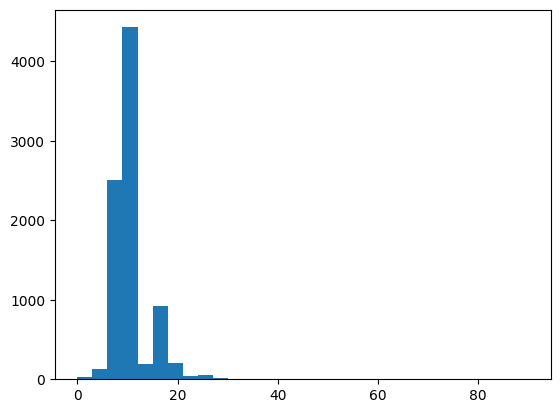

In [13]:
plt.hist(infra['BR_WIDTH'].dropna(), bins=30)

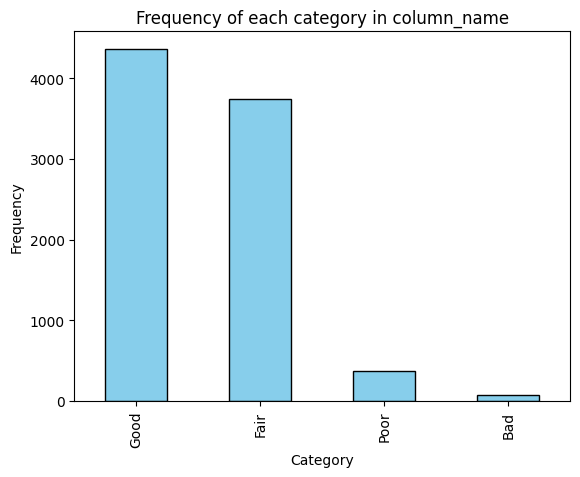

In [ ]:
freq = infra['CONDITION'].value_counts()
freq.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of bridge condition')
plt.show()

In [23]:
import folium
average_lat = sumbong['Latitude'].mean()
average_lon = sumbong['Longitude'].mean()

# create a base map
m = folium.Map(location=[average_lat, average_lon], zoom_start=7)

# plot each office location
for _, row in sumbong.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=row['DistrictEngineeringOffice'],
        color='blue',
        fill=True
    ).add_to(m)

m.save('district_offices_map.html')